In [37]:
import pandas as pd 
import numpy as np 
from numpy import linspace
import seaborn as sns

import matplotlib.pyplot as plt # visualization
from termcolor import colored as cl # text customization

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm

from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric

In [13]:
df = pd.read_csv("D:/ADSP/Hertfordshire-Constabulary/data/df-model-with-onehot.csv")
df

,LSOA_code,outcome_type,crime_type,date_month,2019,2020,2021,2022
0,891,1,0,3,1,0,0,0
1,1059,0,8,3,1,0,0,0
2,1165,1,2,3,1,0,0,0
3,866,0,2,3,1,0,0,0
4,937,0,8,3,1,0,0,0
...,...,...,...,...,...,...,...,...
121355,891,0,5,2,0,0,0,1
121356,501,0,8,2,0,0,0,1
121357,483,0,9,2,0,0,0,1
121358,998,0,8,2,0,0,0,1


In [14]:
x_input = df[["LSOA_code","crime_type","date_month","2019","2020","2021","2022"]]
x_input

,LSOA_code,crime_type,date_month,2019,2020,2021,2022
0,891,0,3,1,0,0,0
1,1059,8,3,1,0,0,0
2,1165,2,3,1,0,0,0
3,866,2,3,1,0,0,0
4,937,8,3,1,0,0,0
...,...,...,...,...,...,...,...
121355,891,5,2,0,0,0,1
121356,501,8,2,0,0,0,1
121357,483,9,2,0,0,0,1
121358,998,8,2,0,0,0,1


In [15]:
y = df["outcome_type"]
y

0         1
1         0
2         1
3         0
4         0
         ..
121355    0
121356    0
121357    0
121358    0
121359    0
Name: outcome_type, Length: 121360, dtype: int64

In [16]:
x_train, x_test, y_train, y_test = train_test_split(
    x_input, 
    y, 
    test_size=0.20,
    random_state=4)

In [17]:
y_test.value_counts()

0    19570
1     4702
Name: outcome_type, dtype: int64

In [18]:
from sklearn.preprocessing import MinMaxScaler
# create scaler
scaler = MinMaxScaler()
# fit scaler on data
scaler.fit(x_train)
# apply transform
x_train = scaler.transform(x_train)
x_train

array([[0.91631445, 0.55555556, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.84023669, 0.88888889, 0.36363636, ..., 1.        , 0.        ,
        0.        ],
       [0.2671175 , 0.88888889, 0.63636364, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.83431953, 0.88888889, 0.54545455, ..., 0.        , 1.        ,
        0.        ],
       [0.71344041, 0.77777778, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.3956044 , 1.        , 0.18181818, ..., 0.        , 1.        ,
        0.        ]])

In [19]:
dct = DecisionTreeClassifier(criterion="entropy", max_depth=3, class_weight="balanced")
dct.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3)

In [20]:
x_test = scaler.transform(x_test)

In [21]:
y_pred = dct.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [22]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[16143  3427]
 [ 2613  2089]]


In [42]:
from sklearn.model_selection import GridSearchCV
class_weight = np.linspace(0.05, 1.5, 20)
grid_para = {'class_weight' : [{0: x, 1: 1.0-x} for x in class_weight]}

gridsearch = GridSearchCV(estimator = DecisionTreeClassifier(),
                          param_grid = grid_para,
                          scoring = 'f1',
                          cv = 3)
gridsearch.fit(x_train, y_train)
print(gridsearch.best_params_)

{'class_weight': {0: 0.20263157894736844, 1: 0.7973684210526315}}


In [68]:
dct = DecisionTreeClassifier(criterion="gini", max_depth=3, 
class_weight={0: 0.20263157894736844, 1: 0.7973684210526315})
dct.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.20263157894736844,
                                     1: 0.7973684210526315},
                       max_depth=3)

In [69]:
y_pred = dct.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[16143  3427]
 [ 2613  2089]]


In [70]:
f1_score(y_test, y_pred)

0.40888627911528674

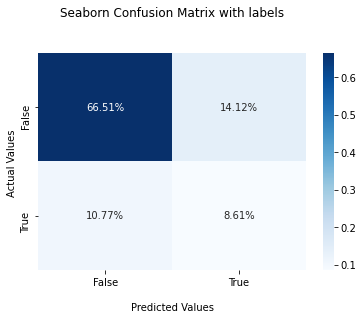

In [45]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84     19570
           1       0.38      0.44      0.41      4702

    accuracy                           0.75     24272
   macro avg       0.62      0.63      0.63     24272
weighted avg       0.77      0.75      0.76     24272



In [49]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='saga', multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(criterion="entropy", max_depth=3),
        'params': {
            'criterion': ['gini','entropy'],
        }
    },
    "XGBClassifier": {
        "model": XGBClassifier(use_label_encoder=False),
        "params": {'n_estimators': range(6, 10),
        'max_depth': range(3, 8),
        'learning_rate': [.2, .3, .4],
        'colsample_bytree': [.7, .8, .9, 1]}
    }     
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, 
    scoring = "f1", return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_metrics = pd.DataFrame(scores, columns=['model','best_score','best_params'])
df_metrics

In [51]:
df_metrics

,model,best_score,best_params
0,svm,0.000000,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.357362,{'n_estimators': 5}
2,logistic_regression,0.000000,{'C': 1}
3,naive_bayes_gaussian,0.147842,{}
4,naive_bayes_multinomial,0.000000,{}
5,decision_tree,0.142619,{'criterion': 'gini'}
6,XGBClassifier,0.204379,"{'colsample_bytree': 0.9, 'learning_rate': 0.4..."


In [52]:
clf_rf = RandomForestClassifier()
clf_rf = RandomForestClassifier(n_estimators=5, 
class_weight={0: 0.20263157894736844, 1: 0.7973684210526315})
clf_rf.fit(x_train, y_train)


RandomForestClassifier(class_weight={0: 0.20263157894736844,
                                     1: 0.7973684210526315},
                       n_estimators=5)

In [53]:
y_pred = clf_rf.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[15942  3628]
 [ 2679  2023]]


In [55]:
f1_score(y_test, y_pred)

0.3908045977011494

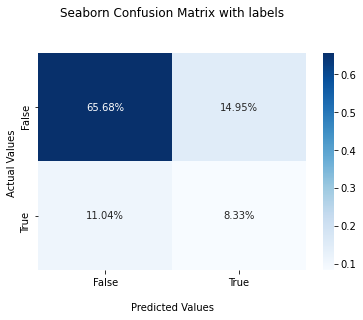

In [54]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [72]:
df_metrics.to_csv(path_or_buf="D:/ADSP/Hertfordshire-Constabulary/data/df-gridsearchsv-metrics.csv", index=False)